# ** [GIT HUB ](https://github.com/JarvisSan22/JC_learn_python_Notebooks)**

* [日本語版の記事]()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:

from skimage.metrics import structural_similarity
import numpy as np
import os, cv2, random
import matplotlib.pyplot as plt 
import glob

#CV2 Resize Test 1 

(1200, 1500, 3) (300, 375, 3)


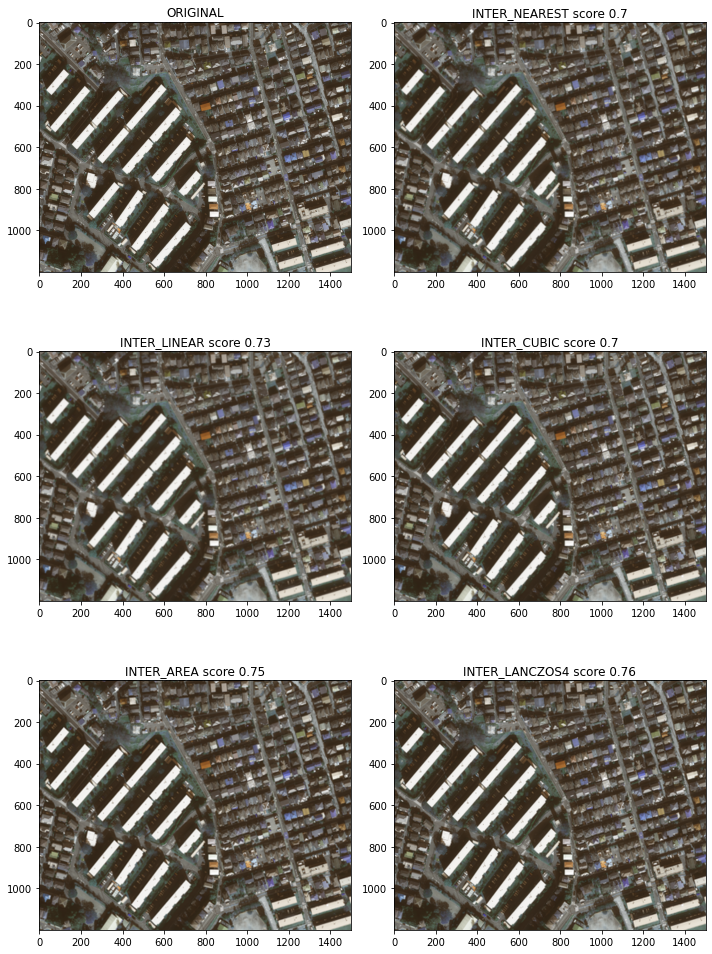

In [ ]:

datadir="/content/drive/MyDrive/Datasets/sat_highres"
f_l=datadir+"/train/train_48_low.tif"
f_h=datadir+"/train/train_48_high.tif"
img_h=cv2.imread(f_h)
img_l=cv2.imread(f_l)
dim_h=img_h.shape
dim_l=img_l.shape
print(dim_h,dim_l)
rx,ry=dim_h[0:2]
resize=(ry,rx)

#resizeのオプション
interpolations=["ORIGINAL",cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
interpolation_names=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
fig,axs=plt.subplots(3,2,figsize=(10,15))
axs=axs.reshape(-1)

out_dic={}

for ax,inter in zip(axs,interpolations):

  if inter == "ORIGINAL":
    ax.imshow(img_h)
    ax.set_title("ORIGINAL")
    out_dic["ORIGINAL"]=[1,img_h]
  
  else:
    img_pl_resize=cv2.resize(img_l.copy(),resize,interpolation=inter)
    score=structural_similarity(img_h,img_pl_resize, multichannel=True)
    out_dic[interpolation_names[inter]]=[score, img_pl_resize]
    ax.imshow(img_pl_resize)
    ax.set_title(interpolation_names[inter]+f" score {round(score,2)}")
  
  fig.tight_layout()

# CV2 Resize Evaluation 

In [ ]:
def Eval_resize(img_o,img_r):
  rx,ry=img_o.shape[0:2]
  resize=(ry,rx)
  #resizeのオプション
  interpolations=[cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
  interpolation_names=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
  out_dic={}
  for inter in interpolations:
    img_resize=cv2.resize(img_r.copy(),resize,interpolation=inter)
    score=structural_similarity(img_o,img_resize, multichannel=True)
    out_dic[interpolation_names[inter]]=[score]
  return out_dic  

In [ ]:

import pandas as pd 
df= pd.DataFrame()

i=0
for f_l in sorted(glob.glob(datadir+"/train/****low.tif")):
  f_h=f_l.replace("low","high")
  img_h=cv2.imread(f_h)
  img_l=cv2.imread(f_l)
  score_dict=Eval_resize(img_h,img_l)
  df_l=pd.DataFrame(index=[i],data=score_dict)
  df=pd.concat([df,df_l],axis=0)
  i+=1

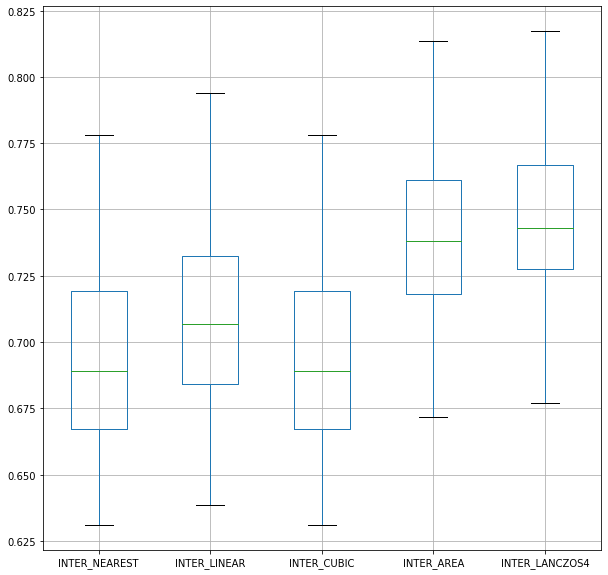

In [ ]:
fig=plt.figure(figsize=(10,10))
ax=df.boxplot()

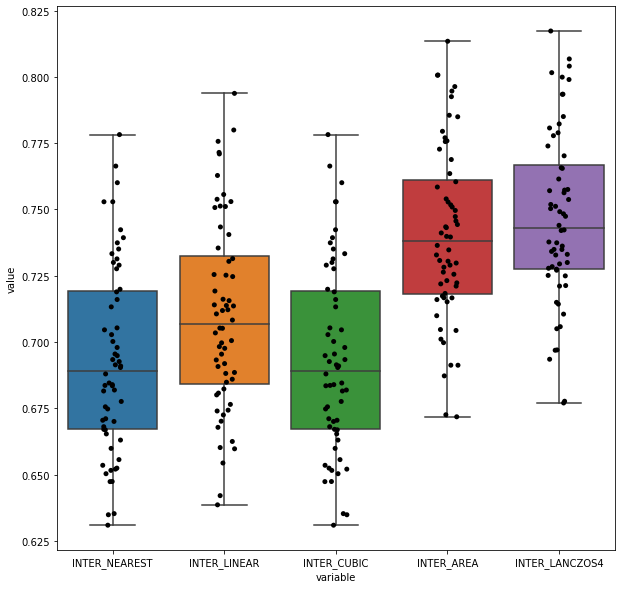

In [ ]:
import seaborn as sns
fig=plt.figure(figsize=(10,10))
df_melt = pd.melt(df)
sns.boxplot(x='variable', y='value', data=df_melt, showfliers=False)
sns.stripplot(x='variable', y='value', data=df_melt, jitter=True, color='black')

 # Test your own image 
 

In [ ]:


def plot_resize_test(img_h,img_l):

  dim_h=img_h.shape
  rx,ry=dim_h[0:2]
  resize=(ry,rx)

  #resizeのオプション
  interpolations=["ORIGINAL",cv2.INTER_NEAREST,cv2.INTER_LINEAR,cv2.INTER_AREA,cv2.INTER_CUBIC,cv2.INTER_LANCZOS4]
  interpolation_names=["INTER_NEAREST","INTER_LINEAR","INTER_AREA","INTER_CUBIC","INTER_LANCZOS4"]
  fig,axs=plt.subplots(3,2,figsize=(10,15))
  axs=axs.reshape(-1)
  
  out_dic={}

  for ax,inter in zip(axs,interpolations):

    if inter == "ORIGINAL":
      ax.imshow(img_h)
      ax.set_title("ORIGINAL")
      out_dic["ORIGINAL"]=[1,img_h]
    
    else:
      img_pl_resize=cv2.resize(img_l.copy(),resize,interpolation=inter)
      print(dim_h,img_pl_resize.shape)

      score=structural_similarity(img_h,img_pl_resize, multichannel=True)
      out_dic[interpolation_names[inter]]=[score, img_pl_resize]
      ax.imshow(img_pl_resize)
      ax.set_title(interpolation_names[inter]+f" score {round(score,2)}")
    
    fig.tight_layout()

Saving Face.png to Face.png
(631, 405, 3)
(631, 405, 3) (63, 40, 3)


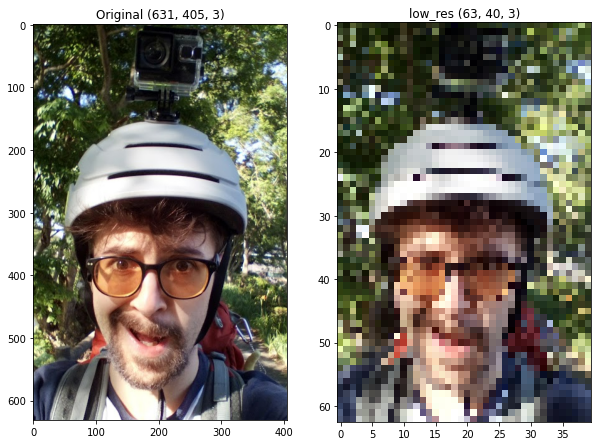

In [ ]:
def upload_file(): 
  from google.colab import files 
  uploaded = files.upload() 
  for k, v in uploaded.items(): 
    open(k, 'wb').write(v) 
  return list(uploaded.keys())[0] 
file=upload_file()
img=cv2.imread(file)[:,:,::-1]
dim=img.shape
print(dim)
scale=10
resize_down=(dim[1]//scale,dim[0]//scale) #downsize to test
img_low=cv2.resize(img,(resize_down))
print(dim,img_low.shape)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,10))
ax1.imshow(img)
ax1.set_title(f'Original {dim}')
ax2.imshow(img_low)
ax2.set_title(f'low_res {img_low.shape}')
plt.show()



(631, 405, 3) (631, 405, 3)
(631, 405, 3) (631, 405, 3)
(631, 405, 3) (631, 405, 3)
(631, 405, 3) (631, 405, 3)
(631, 405, 3) (631, 405, 3)


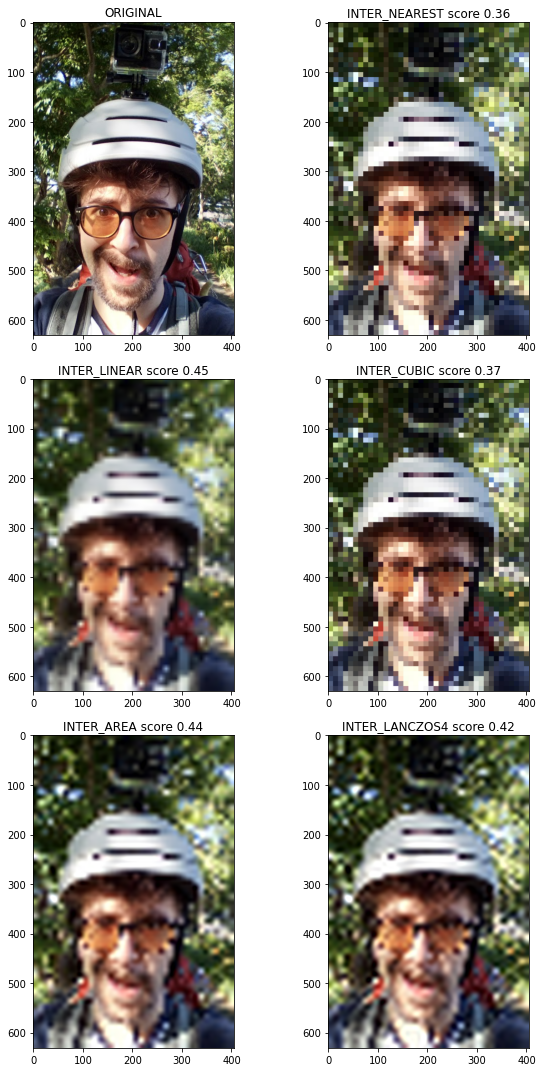

In [ ]:
plot_resize_test(img,img_low)